# PROJETO GUIADO II

**Turma:** Reprograma On33\
**Orientação:** Profa. Stefany Gracy\
**Autoras:** Hitawana Araújo e Nathália Pereira\
**Dataset utilizado:** Global Mental Health Disorders\
**Fonte de dados:** [Kaggle](https://www.kaggle.com/datasets/thedevastator/global-mental-health-disorders)

**Escolha dos dados**: Amantes de leitura, as autoras escolheram o dataset com a curiosidade a respeito dos hábitos de leitura de uma determinada população. Os dados para análise referem-se a informações amostrais de pesquisa com estadunidenses.
O dataset utilizado foi escolhido por conter informações de Gênero, Raça, Idade e Educação, possibilitando uma análise mais completa do perfil dos leitores e relacões sociais de prevalência de determinados grupos. 


***Tratamento de dados:***

In [93]:
# importação dos módulos e pacotes
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind

#importação dataframe considerando a coluna index do arquivo e otimizações de tipo
df = pd.read_csv('./reading_habits.csv')

# COLUNAS: ''Age', 'Sex', 'Race', 'Marital status?', 'Education', 'Employement', 'Incomes', 'How many books did you read during last 12months?', 'Read any printed books during last 12months?', 'Read any audiobooks during last 12months?', 'Read any e-books during last 12months?', 'Last book you read, you…', 'Do you happen to read any daily news or newspapers?', 'Do you happen to read any magazines or journals?']'

# visualização inicial 
# print(df.head())
# print(df.info())
# print(df.columns)
# print(df.describe())

# backup
df_backup = df.copy()

In [87]:
# tipagem
# print(df.dtypes)

# checagem de nulos
print(df.isnull().sum())
df = df.dropna(how='all')

# checagem de duplicados
print(f'\nDuplicados:', df.duplicated().sum())

Age                                                      0
Sex                                                      0
Race                                                     0
Marital status?                                          0
Education                                               58
Employement                                              0
Incomes                                                  0
How many books did you read during last 12months?        0
Read any printed books during last 12months?           390
Read any audiobooks during last 12months?              390
Read any e-books during last 12months?                 390
Last book you read, you…                               390
Do you happen to read any daily news or newspapers?      0
Do you happen to read any magazines or journals?         0
Age Range                                              172
dtype: int64

Duplicados: 0



***Visualizações Gráficas:***


***Graf1: Existem diferenças significativas nos hábitos de leitura entre homens e mulheres?***

Sex
Female    20.0
Male      13.0
Name: How many books did you read during last 12months?, dtype: float64


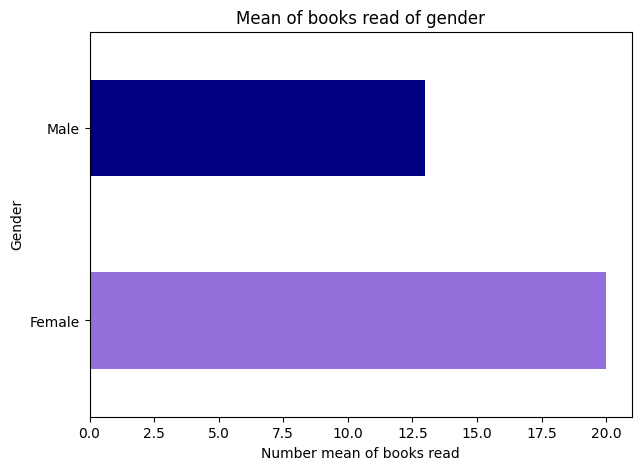

In [77]:
# filtragem para análise da média de livros lidos por gênero feminino/masculino
gender_reader = df.groupby('Sex')['How many books did you read during last 12months?'].mean()
gender_reader = gender_reader.round(0)
print(gender_reader)

fig, ax = plt.subplots(figsize=(7,5))

bars = gender_reader.plot.barh(title='Mean of books read of gender', color=['mediumpurple', 'navy'])
plt.xticks(rotation=0)
plt.ylabel('Gender')
plt.xlabel('Number mean of books read')

plt.show()

***Graf2: Qual é a relação entre o nível de educação formal e o hábito de leitura?***

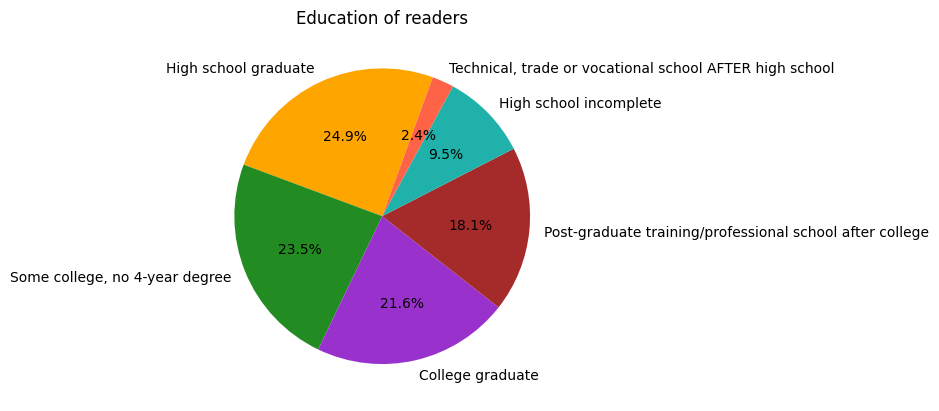

In [78]:
# educação por livros lidos

df_education = df.where(df['Education'] != "Don’t know")
education = df_education['Education'].value_counts()

education.plot.pie(autopct='%1.1f%%', startangle=70,  colors={'darkorchid', 'lightseagreen', 'tomato', 'orange', 'brown', 'forestgreen'})
plt.title('Education of readers')
plt.ylabel('')
plt.show()

***Graf3: Qual a relação entre raça e hábitos de leitura?***
Subquestões: Temos diferenças de raça na quantidade de leitores e na quantidade de livros lidos por esses leitores?

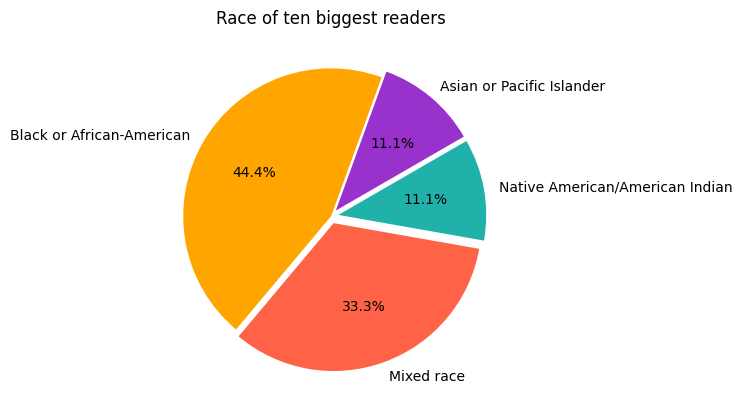

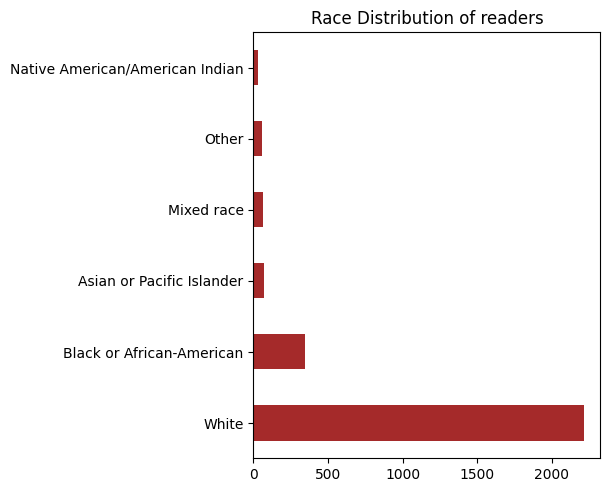

In [90]:
# raça dos 10 maiores leitores em relação ao volume de livros
 
idx_biggest_readers = df['How many books did you read during last 12months?'].nlargest(10).index
biggest_readers = df.loc[idx_biggest_readers]
biggest_readers = biggest_readers.where(biggest_readers['Race'] != 'Refused')

race_biggest_readers = biggest_readers['Race'].value_counts()
race_biggest_readers.plot.pie(autopct='%1.1f%%', startangle=70, explode=(0,0.05,0.05,0.05), colors={'darkorchid', 'lightseagreen', 'tomato', 'orange'})
plt.title('Race of ten biggest readers')
plt.ylabel('')
plt.show()


# raça dos leitores em geral
df_race = df[(df['Race'] != "Don’t know") & (df['Race'] != "Refused")]
race = df_race['Race'].value_counts()
# print(race)
bars = race.plot.barh(color='brown')
plt.tight_layout()
plt.title('Race Distribution of readers')
plt.ylabel('')

plt.show()


***Graf4: Dentre os leitores, como é a distribuição de idades por número de livros nos últimos 12 meses?***

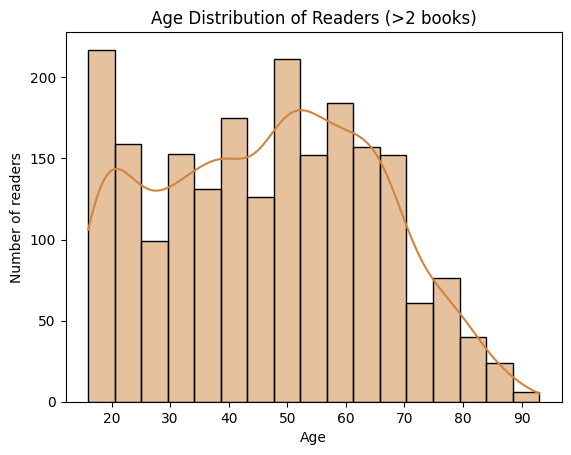

In [80]:
# dataframe filtrado
df_readers = df.loc[df['How many books did you read during last 12months?'] > 2]

# gráfico seaborn para verificação da distribuição etária
age_read = df_readers['Age']

sns.histplot(age_read, kde=True, color='peru')
plt.title('Age Distribution of Readers (>2 books)')
plt.xlabel('Age')
plt.ylabel('Number of readers')

plt.show()

***Graf5: Considerando a faixa etária, quantos livros em média são lidos por ano?***

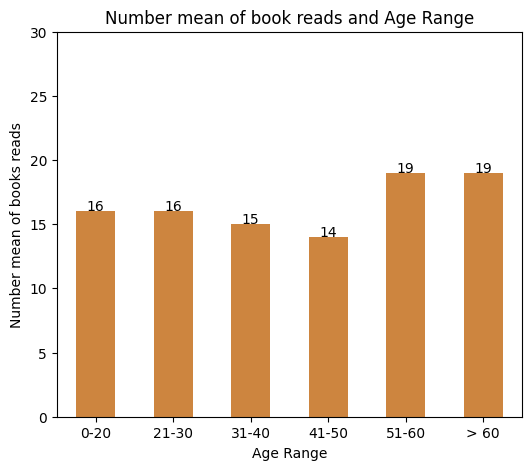

In [81]:
# função de faixa de etária
def age_range(age):
    if age <= 20:
        return '0-20'
    elif age > 21 and age <= 30:
        return '21-30'
    elif age > 31 and age <= 40:
        return '31-40'
    elif age > 41 and age <= 50:
        return '41-50'
    elif age > 51 and age <= 60:
        return '51-60'
    elif age > 60:
        return '> 60'

df['Age Range'] = df['Age'].apply(age_range)
# print(df.head())

# representação gráfica da média de total de livros lidos por idade
age_readers = df.groupby('Age Range')['How many books did you read during last 12months?'].mean()
age_readers = age_readers.round(0)

fig, ax = plt.subplots(figsize=(6,5))

bars = age_readers.plot.bar(title='Number mean of book reads and Age Range', color='peru')
plt.ylabel('Number mean of books reads')
plt.xticks(rotation=0)
ax.set_ylim(0, 30)

for i, v in enumerate(age_readers):
    bars.text(i, v + 0.05, f'{v:.0f}', color = 'black', ha = 'center')

plt.show()

***Consultas SQL:***


***Teste de Hipótese:***


H[0] = Não há relação entre os hábitos de leitura de ebooks e a idade dos leitores
H[1] = Há relação entre os hábitos de leitura de ebooks e a idade dos leitores

Hipotese nula: O consumo do formato E-book não tem relação com as diferenças geracionais.


H1: As diferenças geracionais influenciam significativamente os hábitos de leitura, tanto em termos de quantidade quanto de formato, com faixas etárias mais jovens preferindo formatos digitais e faixas etárias mais velhas mantendo o hábito de leitura com formatos impressos.

Test T Age
Estatística T : -2.9315149412772095
Valor P: 0.003404694244473684


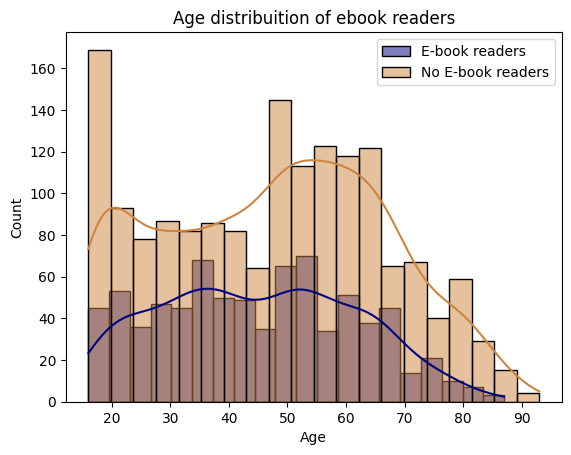

Rejeitamos a hipótese nula


In [88]:
#amostragem
age_ebook_readers = df[df['Read any e-books during last 12months?'] == 'Yes']['Age'].dropna()
age_no_ebook_readers = df[df['Read any e-books during last 12months?'] == 'No']['Age'].dropna()

#teste t independente
estatistica_t, valor_p = ttest_ind(age_ebook_readers, age_no_ebook_readers)

# resultados
print("Test T Age")
print(f"Estatística T : {estatistica_t}")
print(f"Valor P: {valor_p}")

#grafico
sns.histplot(age_ebook_readers, color= 'navy', label ='E-book readers', kde=True, bins= 20)
sns.histplot(age_no_ebook_readers, color = 'peru', label = 'No E-book readers', kde=True, bins= 20)

#rotulos
plt.legend()
plt.title("Age distribuition of ebook readers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")